In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##　CH12 Q10

In [8]:
#(a)
# Set random seed for reproducibility
np.random.seed(42)

# Parameters for data generation
n_obs_per_class = 20  # 20 observations per class
n_classes = 3         # 3 classes
n_features = 50       # 50 variables (features)

# Generate data for each class with a mean shift for distinction
class_1 = np.random.normal(loc=0, scale=1, size=(n_obs_per_class, n_features))
class_2 = np.random.normal(loc=3, scale=1, size=(n_obs_per_class, n_features))
class_3 = np.random.normal(loc=6, scale=1, size=(n_obs_per_class, n_features))

# Combine the data into one dataset
data = np.vstack((class_1, class_2, class_3))

# Create labels for the classes
labels = np.array([0] * n_obs_per_class + [1] * n_obs_per_class + [2] * n_obs_per_class)

# Convert to pandas DataFrame for better visualization
df = pd.DataFrame(data)
df['Class'] = labels

# Display the first few rows of the dataset
print(df.head())

          0         1         2         3         4         5         6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1  0.324084 -0.385082 -0.676922  0.611676  1.031000  0.931280 -0.839218   
2 -1.415371 -0.420645 -0.342715 -0.802277 -0.161286  0.404051  1.886186   
3  0.250493  0.346448 -0.680025  0.232254  0.293072 -0.714351  1.865775   
4  0.357787  0.560785  1.083051  1.053802 -1.377669 -0.937825  0.515035   

          7         8         9  ...        41        42        43        44  \
0  0.767435 -0.469474  0.542560  ...  0.171368 -0.115648 -0.301104 -1.478522   
1 -0.309212  0.331263  0.975545  ...  0.968645 -0.702053 -0.327662 -0.392108   
2  0.174578  0.257550 -0.074446  ...  1.307143 -1.607483  0.184634  0.259883   
3  0.473833 -1.191303  0.656554  ...  0.856399  0.214094 -1.245739  0.173181   
4  0.513786  0.515048  3.852731  ... -0.114736  0.504987  0.865755 -1.200296   

         45        46        47        48        49  Class  
0 -0.71

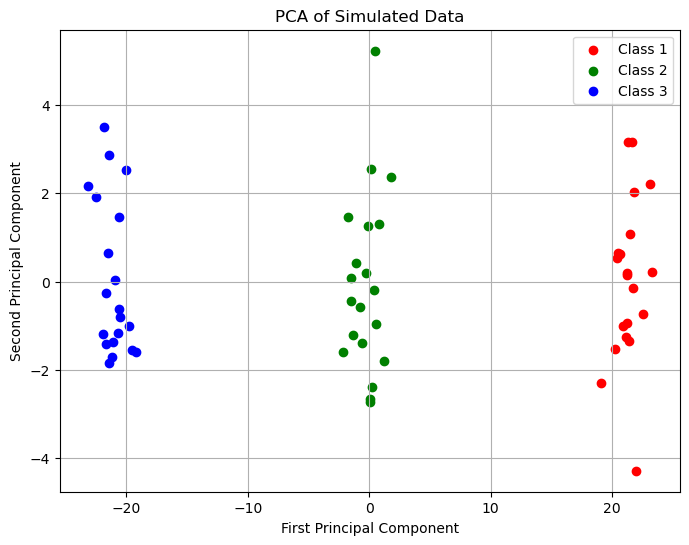

In [37]:
#(b)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = labels

# Plot the first two principal components
plt.figure(figsize=(8, 6))

plt.scatter(principal_components[df['Class'] == 0, 0], principal_components[df['Class'] == 0, 1], color='red', label='Class 1')
plt.scatter(principal_components[df['Class'] == 1, 0], principal_components[df['Class'] == 1, 1], color='green', label='Class 2')
plt.scatter(principal_components[df['Class'] == 2, 0], principal_components[df['Class'] == 2, 1], color='blue', label='Class 3')

plt.title('PCA of Simulated Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()

K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


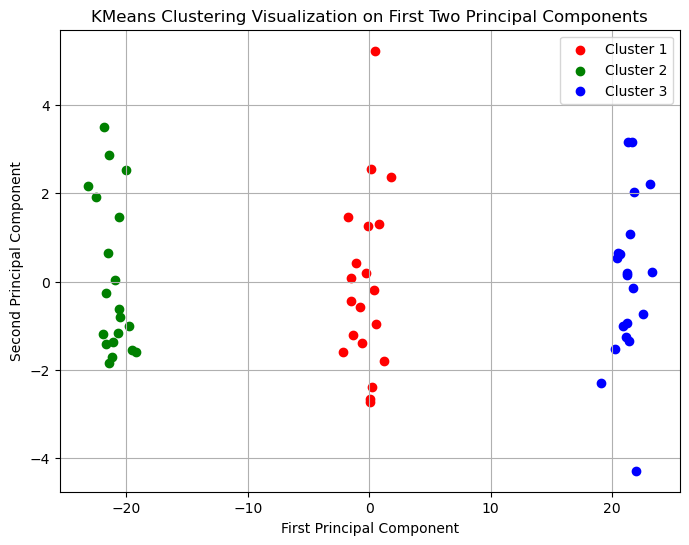

In [39]:
#(c)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Create a DataFrame to compare true labels with K-means cluster labels
comparison_df = pd.DataFrame({'True Class': labels, 'K-means Cluster': kmeans_labels})

# Use pd.crosstab to compare the true class labels to the clustering labels
cluster_comparison = pd.crosstab(comparison_df['True Class'], comparison_df['K-means Cluster'])

# Display the comparison
print(cluster_comparison)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[kmeans_labels == 0, 0], principal_components[kmeans_labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(principal_components[kmeans_labels == 1, 0], principal_components[kmeans_labels == 1, 1], color='green', label='Cluster 2')
plt.scatter(principal_components[kmeans_labels == 2, 0], principal_components[kmeans_labels == 2, 1], color='blue', label='Cluster 3')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

K-means Cluster   0   1
True Class             
0                20   0
1                20   0
2                 0  20


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


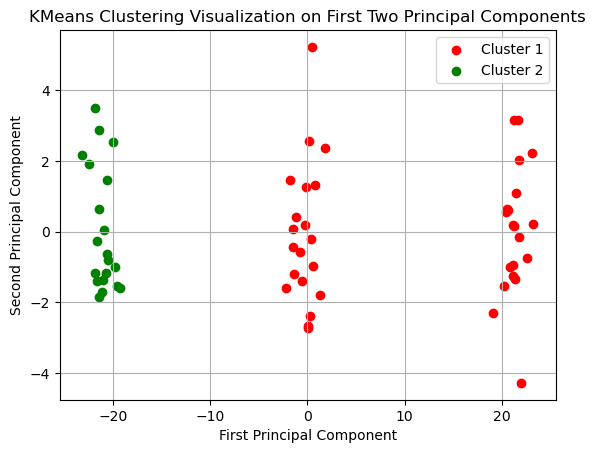

In [43]:
#(d)
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2_labels = kmeans_2.fit_predict(data)

# Create a DataFrame to compare true labels with K-means cluster labels for K=2
comparison_df_2 = pd.DataFrame({'True Class': labels, 'K-means Cluster': kmeans_2_labels})

# Use pd.crosstab to compare the true class labels to the clustering labels for K=2
cluster_comparison_2 = pd.crosstab(comparison_df_2['True Class'], comparison_df_2['K-means Cluster'])

# Display the comparison for K=2 clustering
print(cluster_comparison_2)

plt.scatter(principal_components[kmeans_2_labels == 0, 0], principal_components[kmeans_2_labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(principal_components[kmeans_2_labels == 1, 0], principal_components[kmeans_2_labels == 1, 1], color='green', label='Cluster 2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

### When performing K-means clustering with 𝐾=2, the algorithm tries to divide the data into two clusters, even though we know there are three distinct classes. The results are often a combination of two actual classes grouped into one cluster, while the third class forms the other cluster.

K-means Cluster  0   1   2   3
True Class                    
0                0   0  20   0
1                8   0   0  12
2                0  20   0   0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


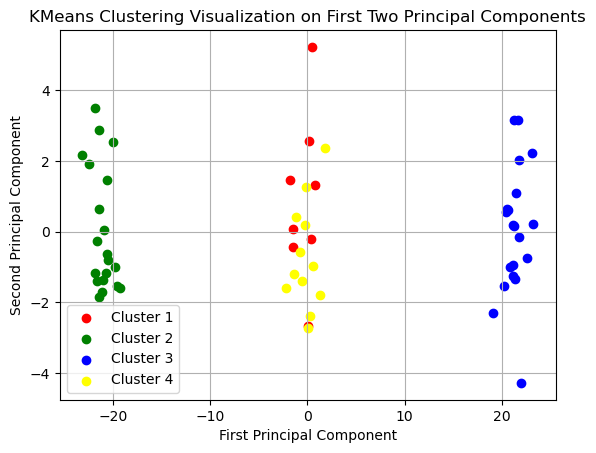

In [45]:
#(e)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4_labels = kmeans_4.fit_predict(data)

# Create a DataFrame to compare true labels with K-means cluster labels for K=4
comparison_df_4 = pd.DataFrame({'True Class': labels, 'K-means Cluster': kmeans_4_labels})

# Use pd.crosstab to compare the true class labels to the clustering labels for K=4
cluster_comparison_4 = pd.crosstab(comparison_df_4['True Class'], comparison_df_4['K-means Cluster'])

# Display the comparison for K=2 clustering
print(cluster_comparison_4)

plt.scatter(principal_components[kmeans_4_labels == 0, 0], principal_components[kmeans_4_labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(principal_components[kmeans_4_labels == 1, 0], principal_components[kmeans_4_labels == 1, 1], color='green', label='Cluster 2')
plt.scatter(principal_components[kmeans_4_labels == 2, 0], principal_components[kmeans_4_labels == 2, 1], color='blue', label='Cluster 3')
plt.scatter(principal_components[kmeans_4_labels == 3, 0], principal_components[kmeans_4_labels == 3, 1], color='yellow', label='Cluster 4')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

### Since there are only three true classes but four clusters, one of the clusters will likely end up being empty or containing very few observations. This happens because K-means will try to divide the data into four parts, leading to one cluster that doesn't have enough data to represent a separate class.

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


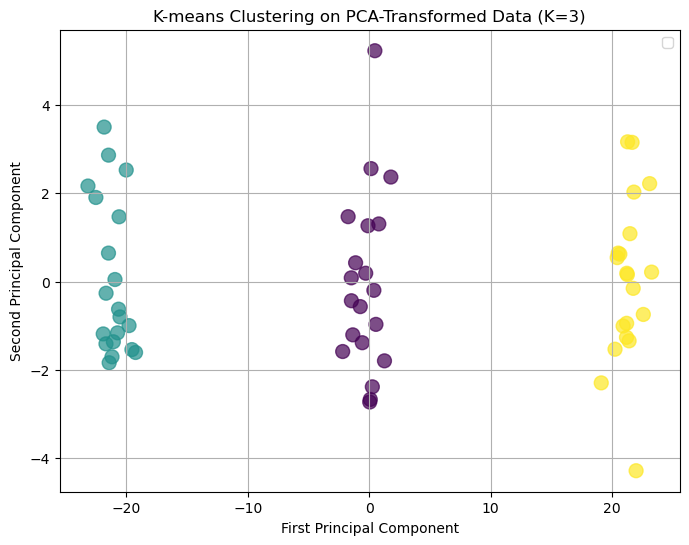

In [47]:
#(f)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Perform K-means clustering with K=3 on the first two principal component score vectors
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(principal_components)

# Create a DataFrame to compare true labels with K-means cluster labels for PCA-transformed data
comparison_df_pca = pd.DataFrame({'True Class': labels, 'K-means Cluster': kmeans_pca_labels})

cluster_comparison_pca = pd.crosstab(comparison_df_pca['True Class'], comparison_df_pca['K-means Cluster'])
print(cluster_comparison_pca)

# Plot the K-means clustering results on the first two principal component score vectors
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_pca_labels, cmap='viridis', s=100, alpha=0.7)

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on PCA-Transformed Data (K=3)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


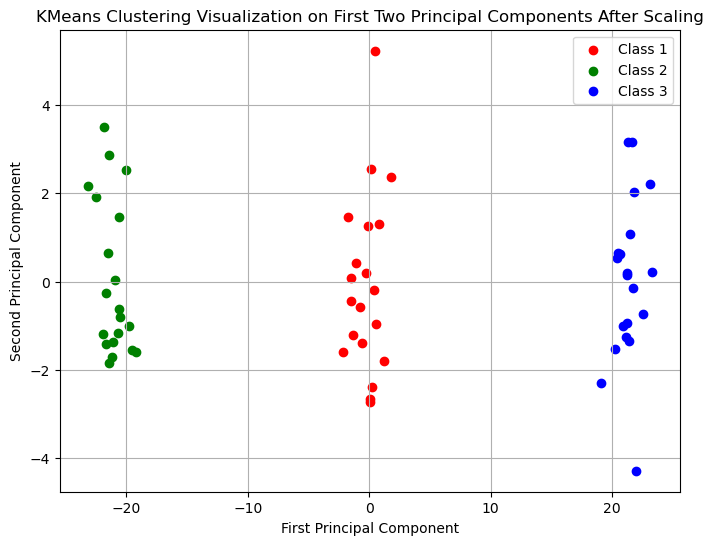

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Perform K-means clustering with K=3 on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(scaled_data)

# Step 3: Compare true labels with K-means cluster labels for scaled data
comparison_df_scaled = pd.DataFrame({'True Class': labels, 'K-means Cluster': kmeans_scaled_labels})
cluster_comparison_scaled = pd.crosstab(comparison_df_scaled['True Class'], comparison_df_scaled['K-means Cluster'])

# Display the comparison for K-means clustering on scaled data
print(cluster_comparison_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[kmeans_scaled_labels == 0, 0], principal_components[kmeans_scaled_labels == 0, 1], color='red', label='Class 1')
plt.scatter(principal_components[kmeans_scaled_labels == 1, 0], principal_components[kmeans_scaled_labels == 1, 1], color='green', label='Class 2')
plt.scatter(principal_components[kmeans_scaled_labels == 2, 0], principal_components[kmeans_scaled_labels == 2, 1], color='blue', label='Class 3')

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering Visualization on First Two Principal Components After Scaling')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Q2

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np

In [51]:
#(a)
# Load the dataset from the 'datasets' package in R
arrests_data = sm.datasets.get_rdataset('USArrests', 'datasets').data

# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the data
scaled_arrests = scaler.fit_transform(arrests_data)

# Initialize PCA with 4 components
arrests_pca = PCA(n_components=4)
# Fit PCA to the scaled data
arrests_pca.fit(scaled_arrests)

# Extract loadings
principal_loadings = arrests_pca.components_
print(principal_loadings)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [53]:
#(b)
cov_matrix = np.cov(scaled_arrests.T)

eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print(eig_vectors[:,:])

[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


In [57]:
#(c)
U, S, Vt = np.linalg.svd(scaled_arrests)

print(Vt[:])

[[-0.53589947 -0.58318363 -0.27819087 -0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


### #(d)Yes,the direction of the eigenvectors (or principal components) differ in sign, but this does not affect the meaning of the components because eigenvectors can be multiplied by -1 and still represent the same direction in space. The loadings will be mathematically equivalent, though the signs or specific numerical orderings might differ.